In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

In [17]:
bsm = pd.read_csv('bsm_data_train.csv')
bsm = pd.DataFrame(bsm)
bsm.tail()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer
2090176,64616153,8687750.0,1724dd3d56108fea2c917f370f77e664,2023-08-31 23:59:50.757,2023-08-31 23:59:53.393,2023-08-31 23:59:53.390,263789487,L
2090177,64616152,8687783.0,45ca01ef5df1fda1da6b9a85e0a26628,2023-08-31 23:59:50.757,2023-08-31 23:59:53.370,2023-08-31 23:59:53.367,395191461,L
2090178,64616154,8687786.0,2acb4b86315d6e49efc0a824b3cba80d,2023-08-31 23:59:53.600,2023-08-31 23:59:57.260,2023-08-31 23:59:57.257,7115420782,L
2090179,64616155,8687774.0,1d767047c6955c86ef4e0626bc60d213,2023-08-31 23:59:55.637,2023-08-31 23:59:57.413,2023-08-31 23:59:57.413,216561658,L
2090180,64616156,8688045.0,e00a871c3291782beb9de879fa5bcf71,2023-08-31 23:59:56.857,2023-08-31 23:59:57.547,2023-08-31 23:59:57.543,555105787,T


In [18]:
bsm.isnull().sum(axis = 0)

ident_bag               0
i_id                    0
pax_id_hash             0
MessageReceivedDate     0
MessageProcessedDate    0
DateEvent               0
TagNumber               0
local_or_transfer       0
dtype: int64

In [19]:
#удалим пропуск в последней строке
bsm = bsm[:-1]

In [20]:
flight = pd.read_csv('flight_rasp_data.csv')
flight = pd.DataFrame(flight)
flight.head()

,i_id,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config
0,8634957.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,6a2feef8ed6a9fe76d6b3f30f02150b4,2023-07-08 00:05:00,Москва,Челябинск,156
1,8634958.0,C,C,3ab7806fac7c2de105704d4ff29dd581,3ab7806fac7c2de105704d4ff29dd581,58d4d1e7b1e97b258c9ed0b37e02d087,2023-07-08 00:05:00,Москва,Шарм-эль-Шейх,202
2,8634961.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,471c75ee6643a10934502bdafee198fb,2023-07-08 00:10:00,Москва,Горно-Алтайск,158
3,8634962.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,9adeb82fffb5444e81fa0ce8ad8afe7a,2023-07-08 00:10:00,Москва,Казань,156
4,8634963.0,B,B,7bac920cc30511dfb81ca2242b293990,f7adf0ba18d705092fa0a1e2f2c0bafb,83cdcec08fbf90370fcf53bdd56604ff,2023-07-08 00:15:00,Москва,Абакан,196


In [21]:
flight.isnull().sum(axis = 0)

i_id                    0
departure_terminal      0
checkin_terminal        0
airline_grouped_hash    0
cco_hash                0
flt_hash                0
t_st                    0
m_city_rus1             0
m_city_rus2             0
config                  0
dtype: int64

In [22]:
#кол-во авиакомпаний
len(flight['cco_hash'].unique())

36

In [23]:
#кол-во стоек
len(flight['airline_grouped_hash'].unique())

36

In [24]:
#проверим соответствие стоек авиакомпаниям: может ли одной стойке соответствовать больше 1 авиакомпании?
sootv = {x : y for x, y in zip(flight['cco_hash'], flight['airline_grouped_hash'])}
len (sootv)
#нет, каждая стойка соответствует лишь одной авиакомпании. это значит, что инфо по стойкам и авиакомпаниям эквивалентна

36

In [25]:
#определим ТОР-5 авиакомпаний, по которым будем строить прогнозы
top = flight.groupby ('cco_hash').agg ({'i_id' : 'count'})
top = top.sort_values(by = 'i_id', ascending = False).head().index

top5 = []
for i in range (len(top)):
  top5.append(top[i])
top5

['f7adf0ba18d705092fa0a1e2f2c0bafb',
 'e2fca8135c2fadca093abd79a6b1c0d2',
 'b1c49f839832f51f6d687a04db101d4c',
 '655610c16fda311d29ed2360a1ffcbd1',
 'c4d62b6dcca08e5caf06c01889282859']

In [26]:
arrival_profile_data = pd.read_csv('arrival_profile_data.csv')
arrival_profile_data = pd.DataFrame(arrival_profile_data)
arrival_profile_data.head()

,ts,checkin_terminal,airline_grouped_hash,pax_arrival_profile
0,2023-06-15 00:00:00.000 +0300,C,100d796971d49bd1046f553b9b942ae7,0.0
1,2023-06-15 00:00:00.000 +0300,B,bbd97b00c539801e32317ab550867ec4,0.0
2,2023-06-15 00:00:00.000 +0300,C,35b5282113b88c2fe23dcbec9f0258c1,0.0
3,2023-06-15 00:00:00.000 +0300,C,d0b1bfd50dd40176f497a2915a6e579b,0.0
4,2023-06-15 00:00:00.000 +0300,B,7f58de3a72e00a866a762143cd799b49,0.0


In [27]:
arrival_profile_data.isnull().sum(axis = 0)

ts                      0
checkin_terminal        0
airline_grouped_hash    0
pax_arrival_profile     0
dtype: int64

In [28]:
arrival_profile_value = pd.read_csv('arrival_profile_value.csv')
arrival_profile_value = pd.DataFrame(arrival_profile_value)
arrival_profile_value.head()

,checkin_terminal,airline_grouped_hash,arrival_profile,value,season
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23


In [29]:
arrival_profile_value.isnull().sum(axis = 0)

checkin_terminal        0
airline_grouped_hash    0
arrival_profile         0
value                   0
season                  0
dtype: int64

## Распределение времени прибытия пассажиров к стойке регистрации

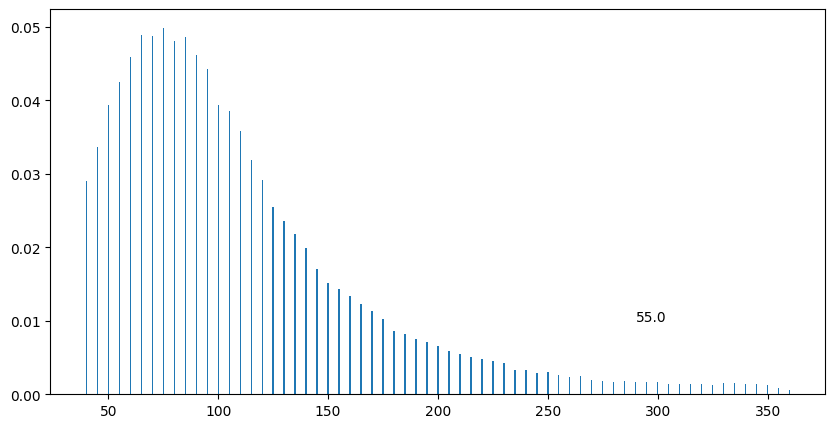

In [30]:
#выберем одну стойку
rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == '7bac920cc30511dfb81ca2242b293990']
#отсортируем в хронологическом порядке прибытие пассажиров
rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
#посчитаем куммулятивную сумму, чтобы понимать долю зарегистрированных пассажиров
rasp['value_sum'] = rasp['value'].cumsum()

dola = rasp[rasp['value_sum'] <= 0.9] #за 55 мин до вылета 90% пассажиров уже зарегистрированы

fig = plt.figure(figsize = (10, 5))
ax = plt.bar (rasp.arrival_profile, rasp.value, width = 0.6)
plt.text(290, 0.01, dola['arrival_profile'].iloc[-1])
plt.show()

рассчитаем время до окончиния регистрации на рейс, в которое прибывают 90% пассажиров. И найдем среднее по всем стойкам

In [31]:
arrival_profile_value['airline_grouped_hash'].unique()

array(['7bac920cc30511dfb81ca2242b293990',
       '3e8d115eb4b32b9e9479f387dbe14ee1',
       '928568b84963ceb76aaaa2cae9afdbfa',
       '7f58de3a72e00a866a762143cd799b49',
       'e2fca8135c2fadca093abd79a6b1c0d2',
       'edd716d0f00574fd83903feb705d290f',
       '1b2d5bac041ba5c7062079117011b112',
       'd38212a0c0e98f678feaaa5a8b9167f5',
       'e3ea649cdf1edd0eb02c4d8c2a15168e',
       '05184b2fec44bde3ebe5d5f386d7e1eb',
       '3df6c1edff7b174300e1a38a6322cd6d',
       '4bba3ab232fc6c57e7dbb1f5932b61d0',
       '3621a25ed04e97eaf99f9fbe17b1b5f8',
       'c4d62b6dcca08e5caf06c01889282859',
       '655610c16fda311d29ed2360a1ffcbd1',
       'fa2649300e79b95a974c00e60a4a5b61',
       '4e36d5be1057ca04d9d2099c759c5347',
       '0539f4139fdf8b3b7ca00bb4f460261f',
       'd0b1bfd50dd40176f497a2915a6e579b',
       '7797a4977c3a265c0b62d06f3b3111e0',
       'e99c19dec2b574bc5d4990504f6cf550',
       'fa868488740aa25870ced6b9169951fb',
       'bbd97b00c539801e32317ab550867ec4',
       '7da

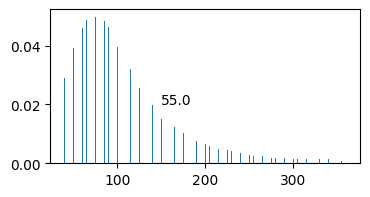

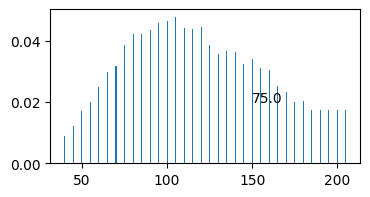

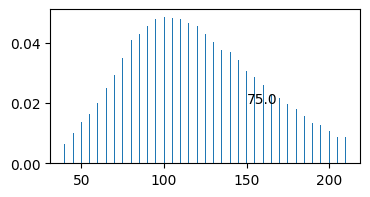

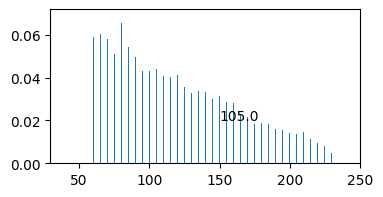

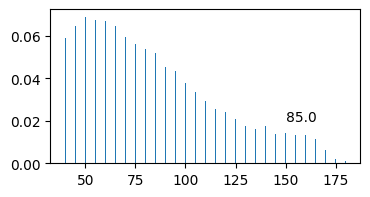

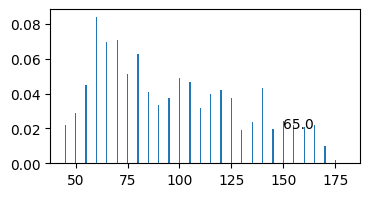

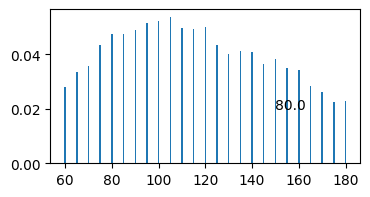

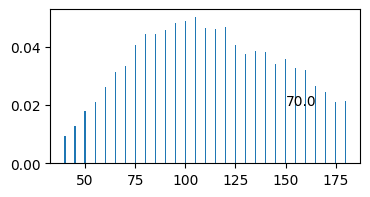

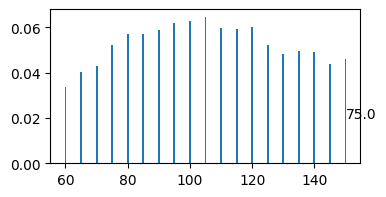

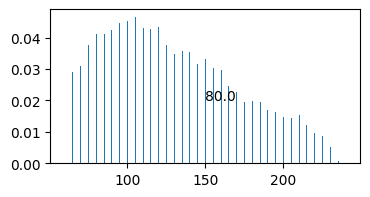

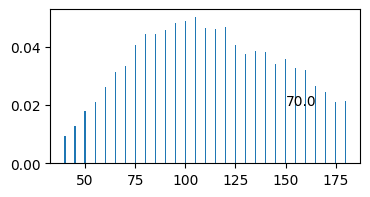

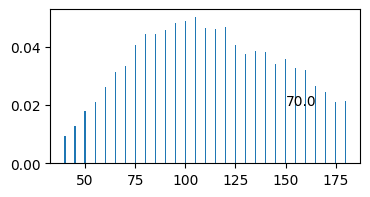

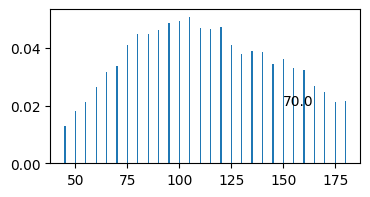

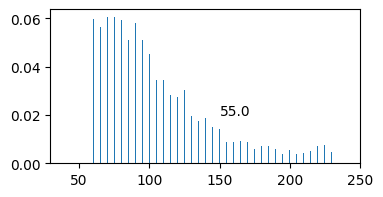

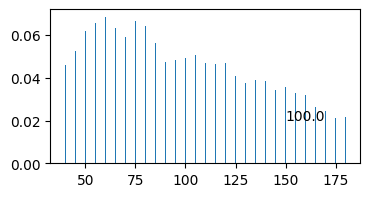

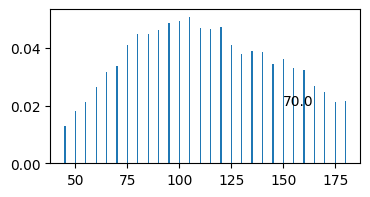

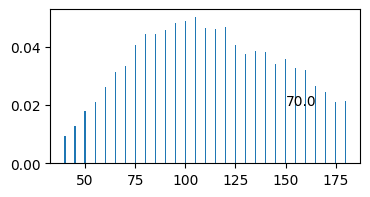

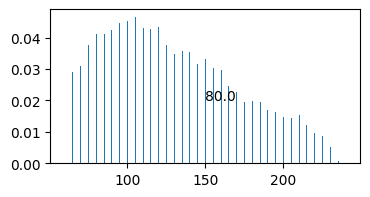

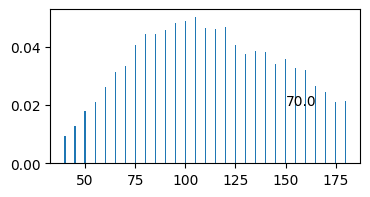

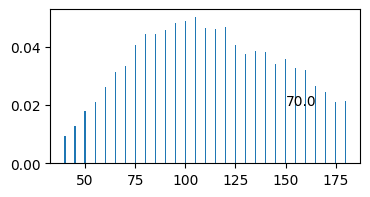

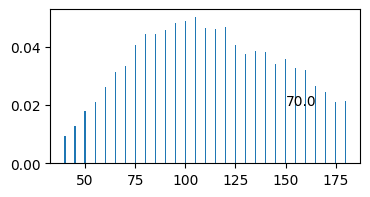

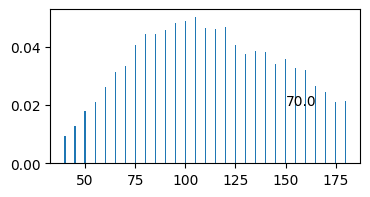

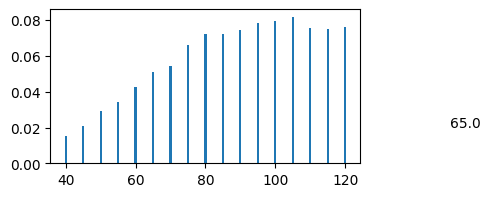

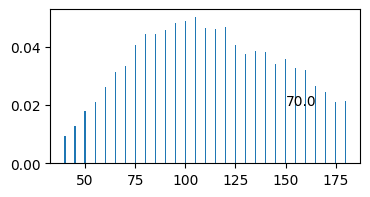

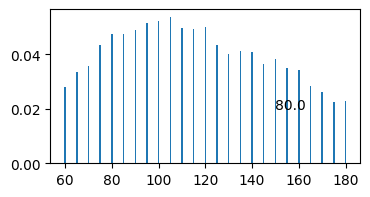

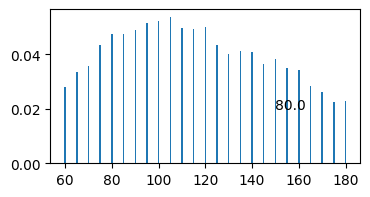

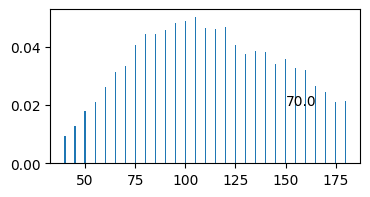

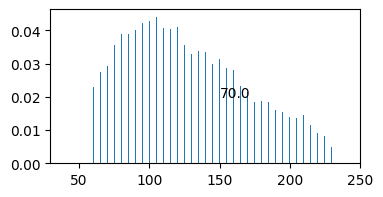

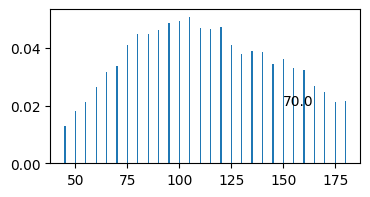

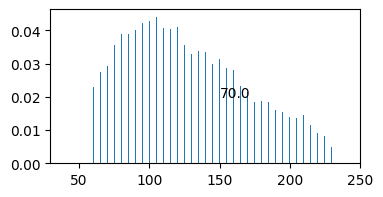

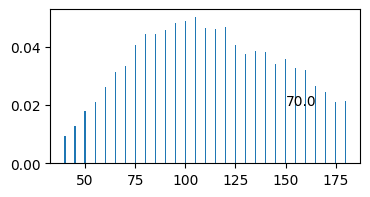

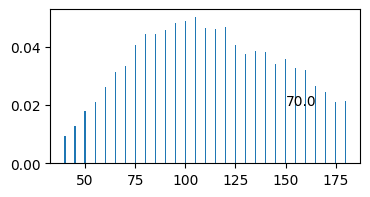

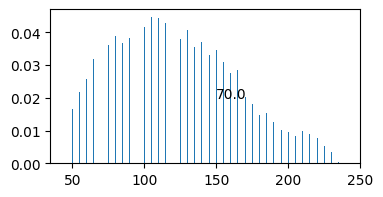

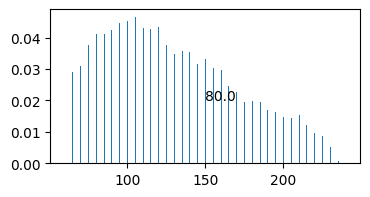

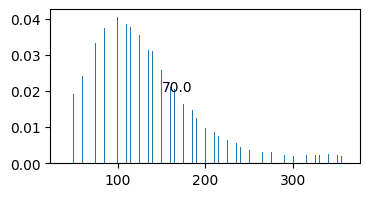

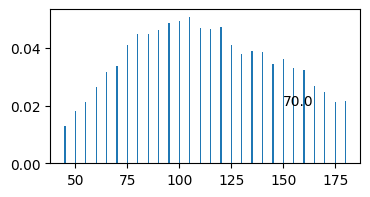

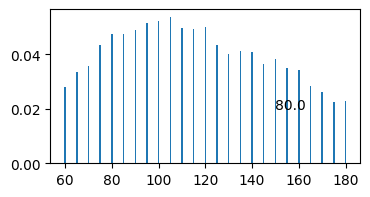

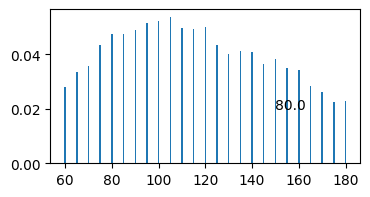

In [32]:
dola_90 = []
for stoika in arrival_profile_value['airline_grouped_hash'].unique():
  rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == stoika]
  rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
  rasp['value_sum'] = rasp['value'].cumsum()
  dola = rasp[rasp['value_sum'] <= 0.9]

  fig = plt.figure(figsize = (4, 2))
  ax = plt.bar (rasp.arrival_profile, rasp.value, width = 0.6)
  plt.text(150, 0.02, dola['arrival_profile'].iloc[-1])
  plt.show()
  dola_90.append(dola['arrival_profile'].iloc[-1])

In [33]:
#выбросы в данном списке указывают на стойки, на которых произошла не стандартная ситуация:
#90% пассажиров зарегистрировались или слишком рано (105) или слишком поздно (55)
dola_90

[55.0,
 75.0,
 75.0,
 105.0,
 85.0,
 65.0,
 80.0,
 70.0,
 75.0,
 80.0,
 70.0,
 70.0,
 70.0,
 55.0,
 100.0,
 70.0,
 70.0,
 80.0,
 70.0,
 70.0,
 70.0,
 70.0,
 65.0,
 70.0,
 80.0,
 80.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 80.0,
 70.0,
 70.0,
 80.0,
 80.0]

In [34]:
sum(dola_90)/len(dola_90)
#73 мин - в среднем это то время до вылета, когда мы знаем данные о багаже 90% пассажиров

73.55263157894737

In [35]:
#дополним данные по профилю прибытия информацией о времени до отлета, когда зарегистрированы 90% пассажиров
reg_time = {x : y for x, y in zip(arrival_profile_value['airline_grouped_hash'].unique(), dola_90)}
arrival_profile_value['reg_time_90'] = 0
for i in range (len (arrival_profile_value)):
  for x,y in reg_time.items():
    if arrival_profile_value['airline_grouped_hash'][i] == x:
      arrival_profile_value['reg_time_90'][i] = y
arrival_profile_value.head()

<ipython-input-35-4a8ae1818c2c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_profile_value['reg_time_90'][i] = y


,checkin_terminal,airline_grouped_hash,arrival_profile,value,season,reg_time_90
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23,55
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23,55
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23,55
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23,55
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23,55


In [36]:
dola_75 = []
for stoika in arrival_profile_value['airline_grouped_hash'].unique():
  rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == stoika]
  rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
  rasp['value_sum'] = rasp['value'].cumsum()
  dola = rasp[rasp['value_sum'] <= 0.75]
  dola_75.append(dola['arrival_profile'].iloc[-1])

In [37]:
reg_time = {x : y for x, y in zip(arrival_profile_value['airline_grouped_hash'].unique(), dola_75)}
arrival_profile_value['reg_time_75'] = 0
for i in range (len (arrival_profile_value)):
  for x,y in reg_time.items():
    if arrival_profile_value['airline_grouped_hash'][i] == x:
      arrival_profile_value['reg_time_75'][i] = y
arrival_profile_value.head()

<ipython-input-37-b49b63841ed0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_profile_value['reg_time_75'][i] = y


,checkin_terminal,airline_grouped_hash,arrival_profile,value,season,reg_time_90,reg_time_75
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23,55,75
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23,55,75
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23,55,75
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23,55,75
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23,55,75


In [38]:
dola_50 = []
for stoika in arrival_profile_value['airline_grouped_hash'].unique():
  rasp = arrival_profile_value[arrival_profile_value['airline_grouped_hash'] == stoika]
  rasp = rasp.sort_values (by= 'arrival_profile', ascending = False)
  rasp['value_sum'] = rasp['value'].cumsum()
  dola = rasp[rasp['value_sum'] <= 0.5]
  dola_50.append(dola['arrival_profile'].iloc[-1])

In [39]:
reg_time = {x : y for x, y in zip(arrival_profile_value['airline_grouped_hash'].unique(), dola_50)}
arrival_profile_value['reg_time_50'] = 0
for i in range (len (arrival_profile_value)):
  for x,y in reg_time.items():
    if arrival_profile_value['airline_grouped_hash'][i] == x:
      arrival_profile_value['reg_time_50'][i] = y
arrival_profile_value.head()

<ipython-input-39-36ef467611ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrival_profile_value['reg_time_50'][i] = y


,checkin_terminal,airline_grouped_hash,arrival_profile,value,season,reg_time_90,reg_time_75,reg_time_50
0,B,7bac920cc30511dfb81ca2242b293990,180.0,0.008569,S23,55,75,100
1,B,7bac920cc30511dfb81ca2242b293990,185.0,0.008135,S23,55,75,100
2,B,7bac920cc30511dfb81ca2242b293990,190.0,0.007548,S23,55,75,100
3,B,7bac920cc30511dfb81ca2242b293990,195.0,0.007107,S23,55,75,100
4,B,7bac920cc30511dfb81ca2242b293990,200.0,0.006526,S23,55,75,100


## Создаем датасет из имеющихся данных

In [40]:
bsm = bsm.merge (flight.set_index ('i_id'), on = 'i_id', validate ='m:m')
bsm.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,2023-07-01 04:31:58.227,2023-07-01 04:32:00.050,2023-07-01 04:32:00.050,425411640,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,2023-07-01 04:36:45.607,2023-07-01 04:36:49.783,2023-07-01 04:36:49.780,425411641,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,2023-07-01 04:38:30.500,2023-07-01 04:38:33.753,2023-07-01 04:38:33.743,425411642,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189


In [41]:
arrival_profile_value = arrival_profile_value.drop(columns = ['season', 'checkin_terminal', 'arrival_profile', 'value'])
arrival_profile_value = arrival_profile_value.groupby (['airline_grouped_hash'], as_index = False).agg ({'reg_time_90':'mean', 'reg_time_75':'mean', 'reg_time_50':'mean'})

In [42]:
#добавляем инфо по времени до вылета и проценту зарегистрированных пассажиров
bsm = bsm.merge (arrival_profile_value.set_index ('airline_grouped_hash'), on = 'airline_grouped_hash', validate ='m:m')
bsm.head()

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,departure_terminal,checkin_terminal,airline_grouped_hash,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config,reg_time_90,reg_time_75,reg_time_50
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,2023-07-01 04:31:58.227,2023-07-01 04:32:00.050,2023-07-01 04:32:00.050,425411640,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,2023-07-01 04:36:45.607,2023-07-01 04:36:49.783,2023-07-01 04:36:49.780,425411641,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,2023-07-01 04:38:30.500,2023-07-01 04:38:33.753,2023-07-01 04:38:33.743,425411642,L,B,C,e2fca8135c2fadca093abd79a6b1c0d2,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0


In [43]:
#расчитаем время обработки сообщений
bsm['MessageReceivedDate'] = bsm['MessageReceivedDate'].apply (lambda x: np.datetime64(x))
bsm['MessageProcessedDate'] = bsm['MessageProcessedDate'].apply (lambda x: np.datetime64(x))

bsm['ProcessingTime'] = bsm['MessageProcessedDate'] - bsm['MessageReceivedDate']

#переведем время обработки сообщений в секунды
from datetime import timedelta
bsm['ProcessingTime']= bsm['ProcessingTime'].apply(lambda x: x.total_seconds())
bsm

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer,departure_terminal,checkin_terminal,...,cco_hash,flt_hash,t_st,m_city_rus1,m_city_rus2,config,reg_time_90,reg_time_75,reg_time_50,ProcessingTime
0,62562416,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:34.413,2023-07-01 06:53:37.720,2023-07-01 06:53:37.717,2425399448,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,3.307
1,62571791,8628981.0,dcd856b334b9685c4f21afa67f3ddc70,2023-07-01 06:53:24.603,2023-07-01 06:53:28.590,2023-07-01 06:53:28.577,2425388102,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,3.987
2,62585837,8628981.0,d1deb9ad74e154bd45625253d3192aec,2023-07-01 04:31:58.227,2023-07-01 04:32:00.050,2023-07-01 04:32:00.050,425411640,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,1.823
3,62585932,8628981.0,edfb80134c7e09bc74dfeead90097018,2023-07-01 04:36:45.607,2023-07-01 04:36:49.783,2023-07-01 04:36:49.780,425411641,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,4.176
4,62585968,8628981.0,a784df5b95726a8e444007c37de942fc,2023-07-01 04:38:30.500,2023-07-01 04:38:33.753,2023-07-01 04:38:33.743,425411642,L,B,C,...,e2fca8135c2fadca093abd79a6b1c0d2,271f17707d8bfd2cd45f7e5182298703,2023-07-01 07:30:00,Москва,Магас,189,85.0,90.0,105.0,3.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085308,64528126,8685054.0,eb852fdeb37a79d69997763d42401fce,2023-08-29 08:00:14.550,2023-08-29 08:00:15.343,2023-08-29 08:00:15.340,954226444,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,0.793
2085309,64528144,8685054.0,335ccdfc8679cb2fcf806b8fd39921ff,2023-08-29 08:01:06.583,2023-08-29 08:01:10.110,2023-08-29 08:01:10.107,954226445,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,3.527
2085310,64528149,8685054.0,12ae39c6cb2b04fbff887f267370719a,2023-08-29 08:01:15.520,2023-08-29 08:01:17.857,2023-08-29 08:01:17.853,954226446,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,2.337
2085311,64528159,8685054.0,381c372eb90a811dfadc78bce37172ad,2023-08-29 08:01:37.457,2023-08-29 08:01:41.250,2023-08-29 08:01:41.247,954226447,L,C,C,...,4bba3ab232fc6c57e7dbb1f5932b61d0,87f4d79e36d68c3031ccf6c55e9bbd39,2023-08-29 09:35:00,Москва,Шарм-эль-Шейх,186,70.0,90.0,115.0,3.793


In [44]:
bsm.describe().applymap("{0:.5f}".format)

,ident_bag,i_id,TagNumber,config,reg_time_90,reg_time_75,reg_time_50,ProcessingTime
count,2085313.00000,2085313.00000,2085313.00000,2085313.00000,2085313.00000,2085313.00000,2085313.00000,2085313.00000
mean,63592707.19276,8657837.66367,831809925.47646,241.66849,66.17692,84.05288,109.83164,2.36749
std,589577.40659,17189.01092,1204988297.15835,109.18464,14.42633,11.31682,12.64620,2.15245
min,62489999.00000,8628855.00000,1.00000,0.00000,55.00000,70.00000,95.00000,0.02000
25%,63080218.00000,8642816.00000,555070064.00000,158.00000,55.00000,75.00000,100.00000,1.35600
50%,63591403.00000,8657640.00000,555379903.00000,189.00000,55.00000,75.00000,100.00000,2.27000
75%,64104232.00000,8672752.00000,555765976.00000,316.00000,70.00000,90.00000,125.00000,3.18700
max,64616155.00000,8701701.00000,9910197403.00000,550.00000,105.00000,115.00000,140.00000,113.17000


In [45]:
#в данных есть выбросы по времени обработки сообщений, надо их убрать
bsm.sort_values(by = 'ProcessingTime', ascending = False)
bsm=bsm[bsm['ProcessingTime'] < 8]

In [46]:
#функция для формирования датасета для определенной стойки регистрации

def create_df (company_name, bsm):
  bsm = bsm[bsm['cco_hash'] == company_name]

  #посчитаем количество сообщений ежеминутно
  bsmQuatity = bsm.set_index(['MessageReceivedDate']).config.resample('5T').count()
  df = pd.DataFrame (data=bsmQuatity)
  df = df.rename(columns ={'config' : 'bsmQuatity'})

  #добавим среднее время обработки сообщений
  df['MeanProcessingTime'] = bsm.set_index(['MessageReceivedDate']).ProcessingTime.resample('5T').mean()

  #добавим информацию об оставщемсядо вылета времени, когда зарегистрировано 90% пассажиров
  df['RegTime90'] = bsm.set_index(['MessageReceivedDate']).reg_time_90.resample('5T').mean()

  #добавим информацию об оставщемсядо вылета времени, когда зарегистрировано 75% пассажиров
  df['RegTime75'] = bsm.set_index(['MessageReceivedDate']).reg_time_75.resample('5T').mean()

  #добавим информацию об оставщемсядо вылета времени, когда зарегистрировано 50% пассажиров
  df['RegTime50'] = bsm.set_index(['MessageReceivedDate']).reg_time_50.resample('5T').mean()

  return df

In [47]:
#по каждой стоке построим датасет
df_1 = create_df(top5[0], bsm).fillna(0)
df_2 = create_df(top5[1], bsm).fillna(0)
df_3 = create_df(top5[2], bsm).fillna(0)
df_4 = create_df(top5[3], bsm).fillna(0)
df_5 = create_df(top5[4], bsm).fillna(0)

In [48]:
#датасет по всем стойкам

bsmQuatity = bsm.set_index(['MessageReceivedDate']).config.resample('5T').count()
df = pd.DataFrame (data=bsmQuatity)
df = df.rename(columns ={'config' : 'bsmQuatity'})
df['MeanProcessingTime'] = bsm.set_index(['MessageReceivedDate']).ProcessingTime.resample('5T').mean()
df['RegTime90'] = bsm.set_index(['MessageReceivedDate']).reg_time_90.resample('5T').mean()
df['RegTime75'] = bsm.set_index(['MessageReceivedDate']).reg_time_75.resample('5T').mean()
df['RegTime50'] = bsm.set_index(['MessageReceivedDate']).reg_time_50.resample('5T').mean()
df

,bsmQuatity,MeanProcessingTime,RegTime90,RegTime75,RegTime50
MessageReceivedDate,,,,,
2023-07-01 00:00:00,100,3.114310,67.700000,85.350000,110.950000
2023-07-01 00:05:00,89,2.890719,67.359551,85.449438,111.235955
2023-07-01 00:10:00,125,2.824536,64.360000,83.040000,108.680000
2023-07-01 00:15:00,123,2.713967,65.691057,84.024390,110.406504
2023-07-01 00:20:00,122,2.697230,63.278689,82.254098,109.057377
...,...,...,...,...,...
2023-08-31 23:35:00,117,2.159402,72.521368,89.401709,114.358974
2023-08-31 23:40:00,134,2.257866,72.276119,89.067164,113.917910
2023-08-31 23:45:00,144,2.103785,74.479167,90.972222,116.666667


##графики временных рядов по стойкам и в общем

In [49]:
#функция для отрисовки графиков временных рядов
def visual_ts (df):
	values = df.values
	# specify columns to plot
	groups = [0, 1, 2, 3, 4]
	i = 1
	# plot each column
	plt.figure(figsize=(15, 8))
	for group in groups:
		plt.subplot(len(groups), 1, i)
		plt.plot(values[:, group])
		plt.title(df.columns[group], y=0.5, loc='right')
		i += 1
	plt.show()

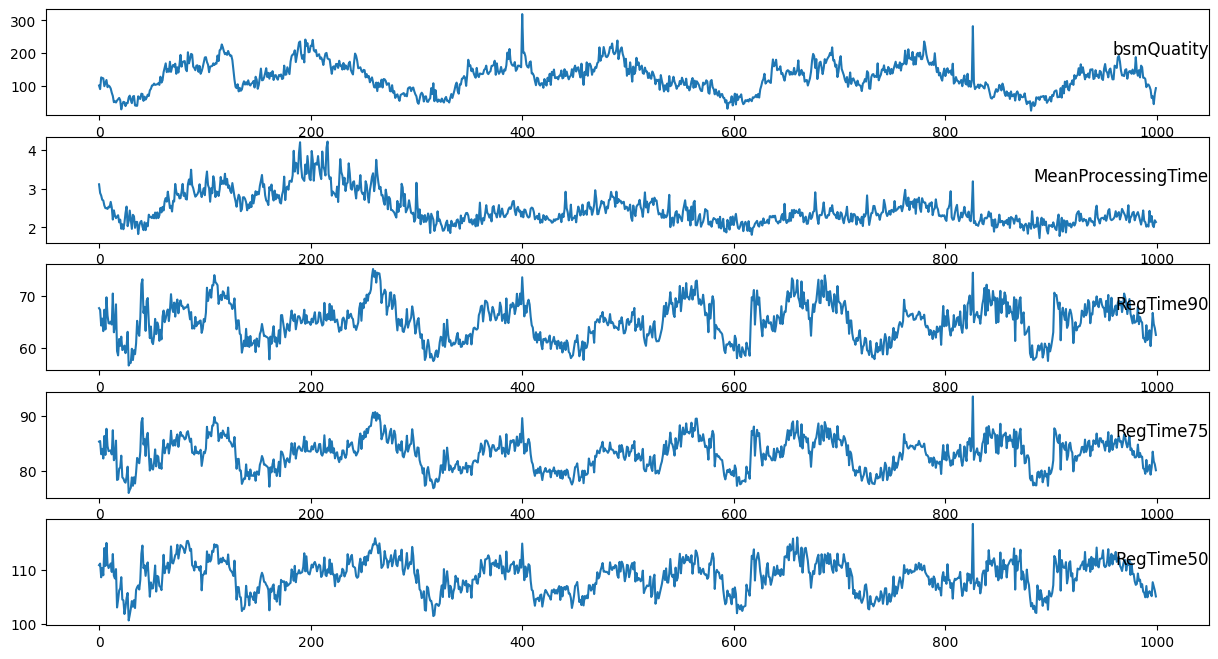

In [50]:
#построим графики получившихся временных рядов
#график по всем стойкам:
visual_ts(df[:1000])

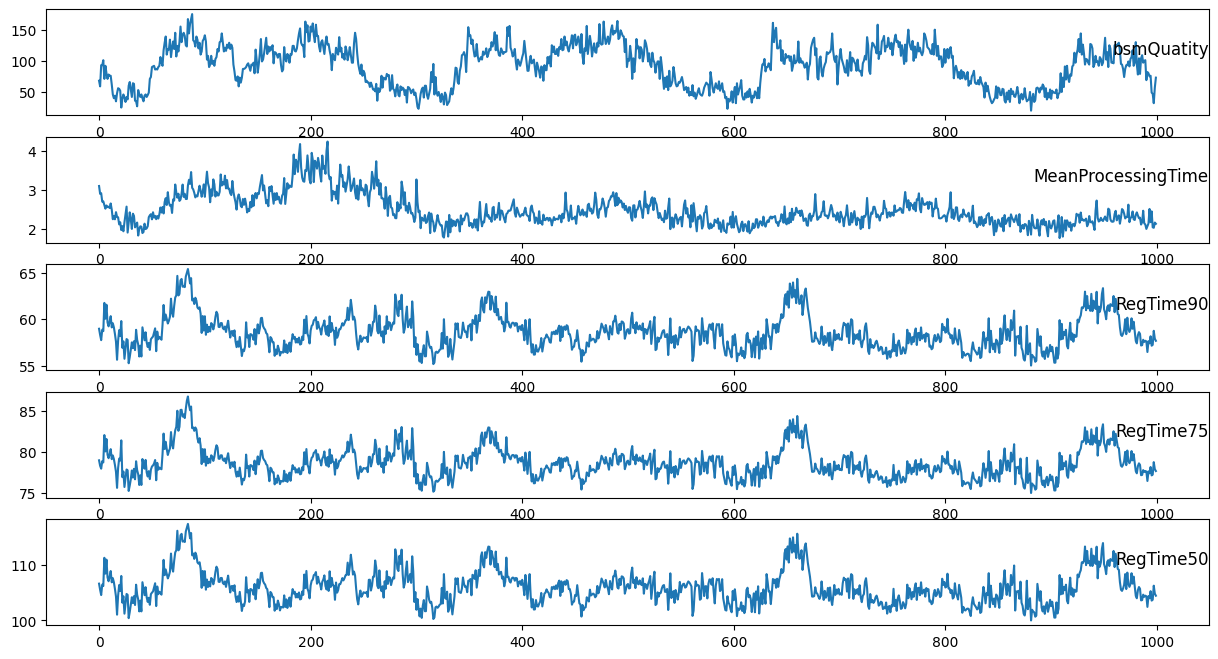

In [51]:
#графики для стойки 1

visual_ts(df_1[:1000])


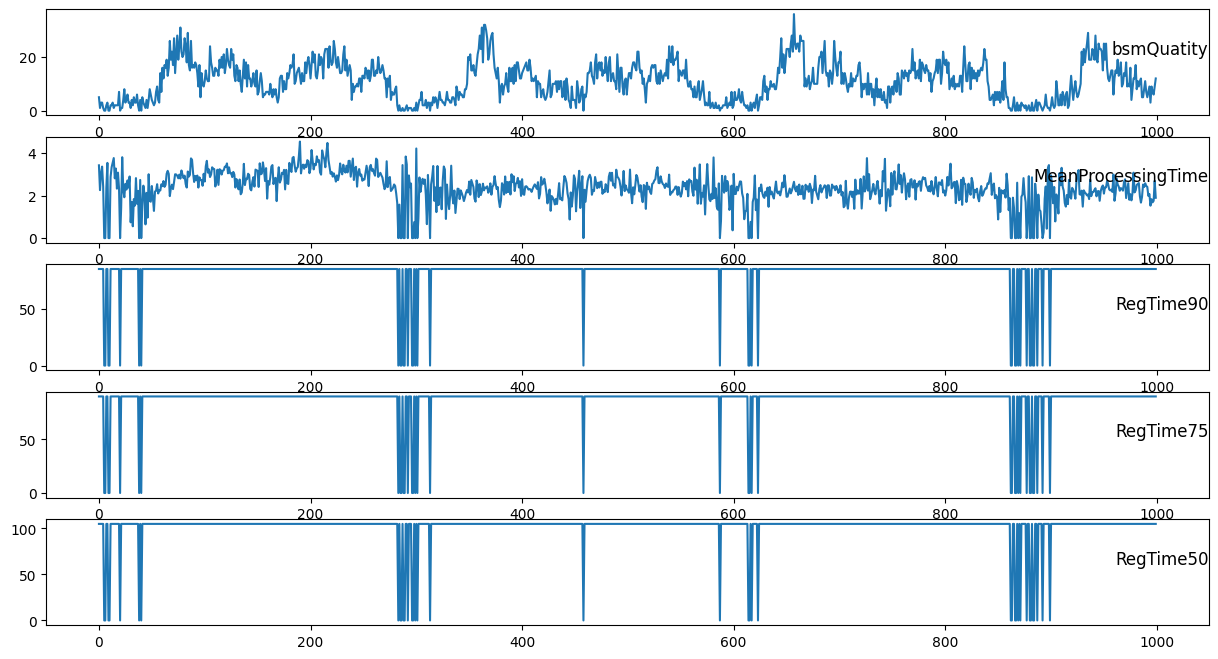

In [52]:
visual_ts(df_2[:1000])

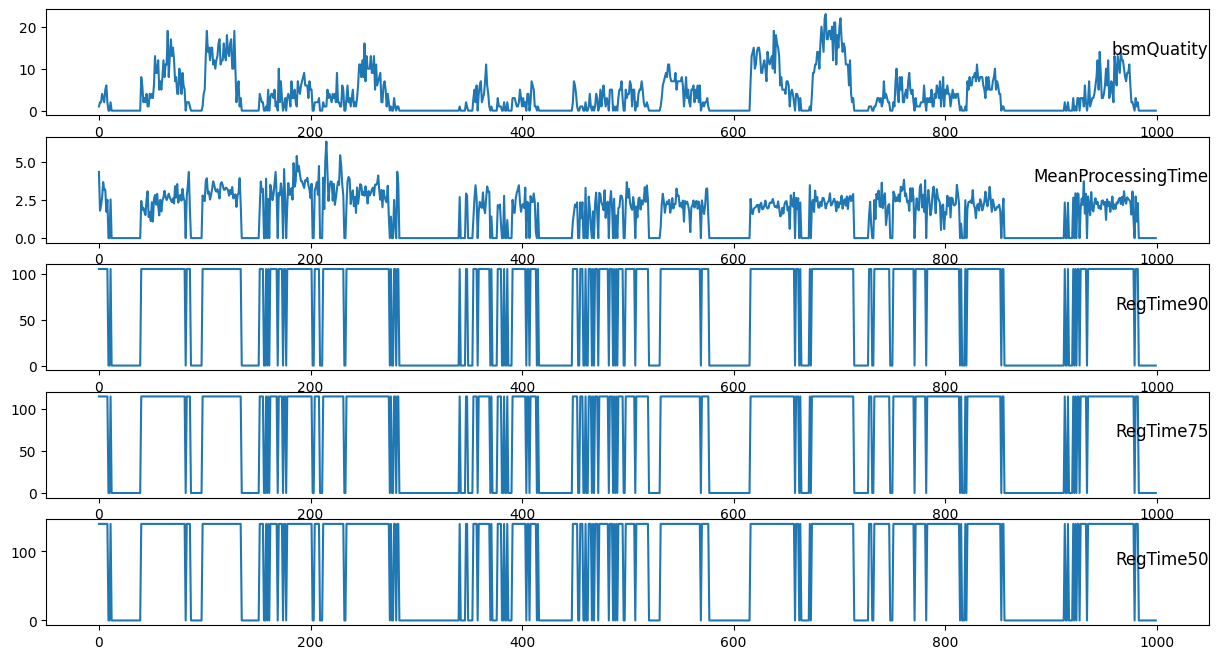

In [53]:
visual_ts(df_3[:1000])

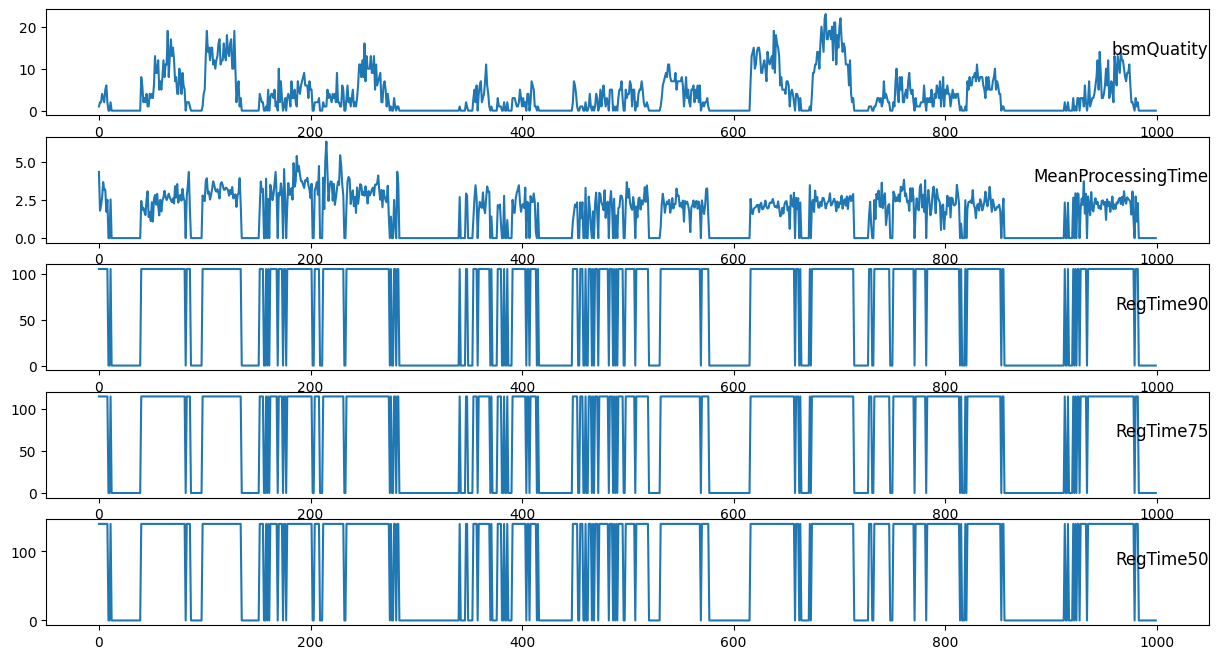

In [54]:
visual_ts(df_3[:1000])

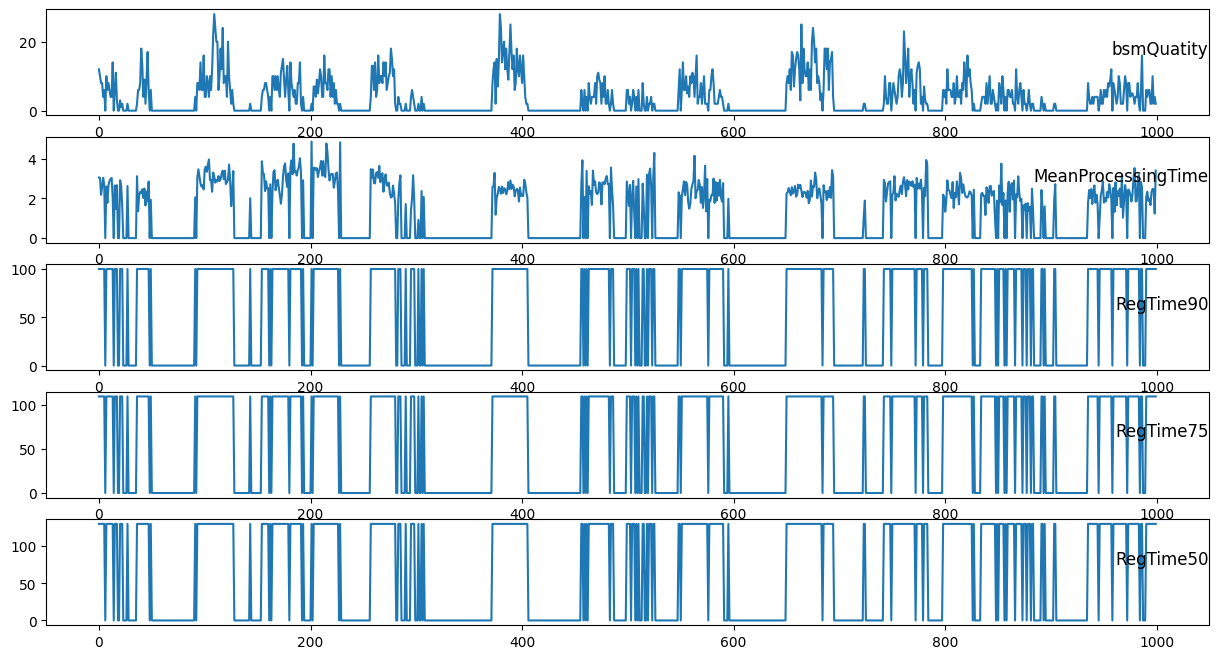

In [55]:
visual_ts(df_4[:1000])

In [56]:
df.to_csv('df.csv', index = False)
print ('Ready!')

Ready!


##модель/прогноз (bsm quantity)

In [57]:
len(df)

17856

In [58]:
#делим на трейн и валидацию:

X = df['bsmQuatity']

X_train = X[:14000]
X_valid = X[14000:]


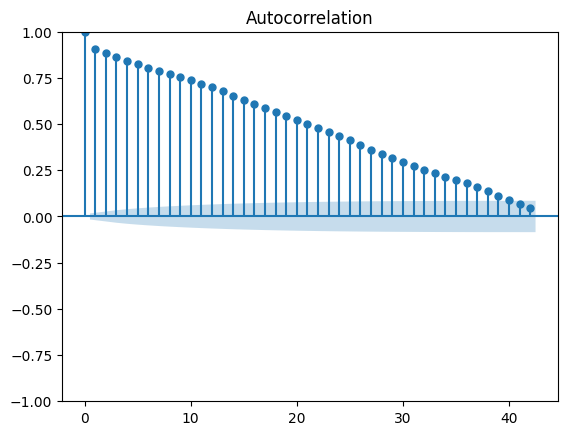

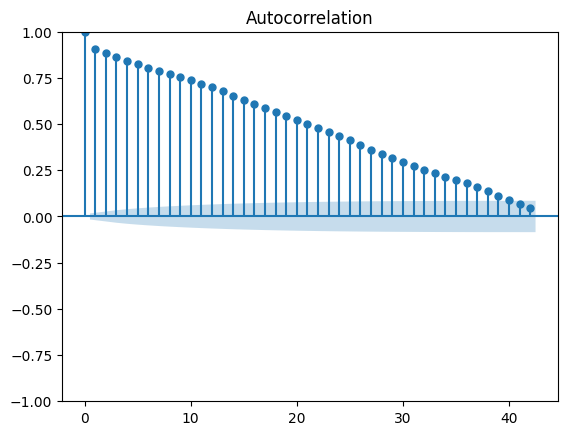

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(X_train)

In [60]:
from statsmodels.tsa.stattools import adfuller
print (adfuller (X_train)[1])

#ряд стационарный (значение теста Дикки-Фуллера низкое) с высокой автокорреляцией и без сезонности

6.189298740270831e-30


In [61]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00


In [62]:
from pmdarima.arima import auto_arima
model_bsm = auto_arima(X_train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=116454.974, Time=7.67 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=142855.601, Time=0.88 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=118712.681, Time=2.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=135406.538, Time=6.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=174357.987, Time=0.71 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=116543.197, Time=7.21 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=116567.734, Time=7.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=116451.438, Time=10.36 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=116600.465, Time=9.60 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=116451.480, Time=13.14 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=116476.707, Time=11.42 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=116452.910, Time=10.15 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=116491.123, Time=9.31 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=116722.652, Time=8.24 sec
 

In [63]:
# прогноз можем получить методом predict, указав горизонт прогнозирования
preds = model_bsm.predict(len(X_valid))

In [64]:
result = pd.DataFrame (data = preds).rename (columns = { 0 : 'pred_bsm'})
result['real'] = X_valid
diff = preds - X_valid
result ['difference'] = diff

result

,pred_bsm,real,difference
2023-08-18 14:40:00,121.400922,107,14.400922
2023-08-18 14:45:00,121.456459,145,-23.543541
2023-08-18 14:50:00,121.478491,113,8.478491
2023-08-18 14:55:00,121.276106,114,7.276106
2023-08-18 15:00:00,121.230165,148,-26.769835
...,...,...,...
2023-08-31 23:35:00,117.113485,117,0.113485
2023-08-31 23:40:00,117.113485,134,-16.886515
2023-08-31 23:45:00,117.113485,144,-26.886515
2023-08-31 23:50:00,117.113485,158,-40.886515


## модель/прогноз (MeanProcessintTime)

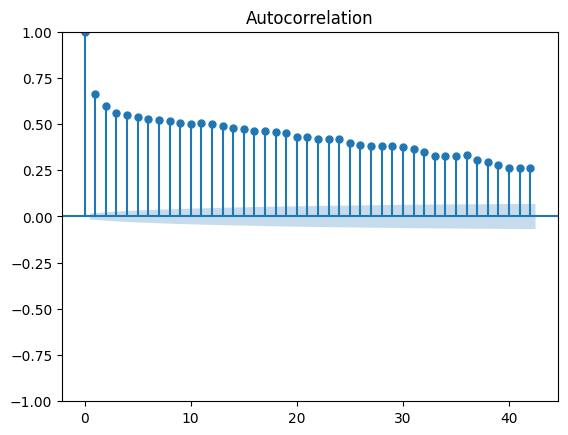

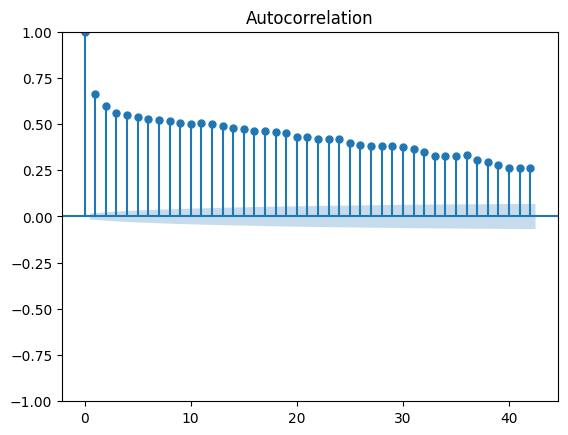

In [65]:
X2 = df['MeanProcessingTime'].fillna(0)

X2_train = X2[:14000]
X2_valid = X2[14000:]

plot_acf(X2_train)

In [66]:
print (adfuller (X2_train)[1])

2.354190741728639e-20


In [67]:
model_mpt = auto_arima(X2_train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-13518.101, Time=8.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-8481.781, Time=5.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10987.906, Time=2.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13103.882, Time=5.81 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-8483.779, Time=0.80 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-13378.177, Time=12.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-13425.433, Time=11.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-13558.882, Time=10.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-12802.896, Time=6.52 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-13541.609, Time=11.50 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-13584.171, Time=12.85 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-13534.794, Time=12.04 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-13599.017, Time=11.62 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-13594.446, Time=11.36 sec

In [68]:
preds2 = model_mpt.predict(len(X2_valid))

In [69]:
result['pred_mpt'] = preds2
result['real_mpt'] = X2_valid
diff2 = preds2 - X2_valid
result ['difference2'] = diff2
result.head(10)

,pred_bsm,real,difference,pred_mpt,real_mpt,difference2
2023-08-18 14:40:00,121.400922,107,14.400922,2.248384,2.397589,-0.149205
2023-08-18 14:45:00,121.456459,145,-23.543541,2.231168,2.122462,0.108706
2023-08-18 14:50:00,121.478491,113,8.478491,2.226075,2.217195,0.008880
2023-08-18 14:55:00,121.276106,114,7.276106,2.227260,2.199956,0.027304
2023-08-18 15:00:00,121.230165,148,-26.769835,2.225703,2.226696,-0.000993
2023-08-18 15:05:00,121.075004,158,-36.924996,2.224696,2.316918,-0.092221
2023-08-18 15:10:00,121.004221,150,-28.995779,2.226247,2.269133,-0.042886
2023-08-18 15:15:00,120.876923,175,-54.123077,2.225781,2.178206,0.047575
2023-08-18 15:20:00,120.795443,163,-42.204557,2.224927,2.058025,0.166903
2023-08-18 15:25:00,120.685239,201,-80.314761,2.225889,2.259751,-0.033862


##метрики качества

In [70]:
MAE_bsm = sum (abs(result['difference']))/len(result)
print(MAE_bsm)
MAE_mpt = sum (abs(result['difference2']))/len(result)
print(MAE_mpt)

32.255023521177826
0.1396147004193481


In [71]:
MSE_bsm = sum(result['difference']**2)/len(result)
print (MSE_bsm)
MSE_mpt = sum(result['difference2']**2)/len(result)
print (MSE_mpt)

1606.869789954615
0.04855183360303215


In [72]:
MAPE_bsm =  sum(100*(abs(result['real'] - result['pred_bsm'])/result['real']))/len(result)
print(MAPE_bsm)
MAPE_mpt =  sum(100*(abs(result['real_mpt'] - result['pred_mpt'])/result['real_mpt']))/len(result)
print(MAPE_mpt)

35.75018424022947
6.273338781924983


In [73]:
df.describe().applymap("{0:.5f}".format)

,bsmQuatity,MeanProcessingTime,RegTime90,RegTime75,RegTime50
count,17856.00000,17849.00000,17849.00000,17849.00000,17849.00000
mean,116.34095,2.22959,65.79770,83.73180,109.48667
std,39.85045,0.21364,3.83489,3.08424,3.23269
min,0.00000,1.44353,55.26316,75.26316,100.13514
25%,88.00000,2.10500,63.17308,81.58385,107.18447
50%,117.00000,2.21308,65.64024,83.76238,109.66216
75%,145.00000,2.33003,68.33333,85.76190,111.67630
max,319.00000,6.12112,85.72581,99.54545,125.30303


In [74]:
result.describe()

,pred_bsm,real,difference,pred_mpt,real_mpt,difference2
count,3856.000000,3856.000000,3856.000000,3856.000000,3856.000000,3856.000000
mean,117.158109,118.083766,-0.925656,2.225581,2.208562,0.017019
std,0.316855,40.122814,40.080289,0.000380,0.219719,0.219715
min,117.113485,13.000000,-134.886515,2.224696,1.667579,-3.895542
25%,117.113485,92.000000,-27.886515,2.225573,2.092907,-0.082092
50%,117.113485,117.000000,0.113485,2.225573,2.197346,0.028227
75%,117.113485,145.000000,25.113578,2.225573,2.307665,0.132667
max,121.478491,252.000000,104.113485,2.248384,6.121115,0.557994


##Бизнес-применение

In [75]:
#расчитаем максимальную пропускную способность стоек регистрации за 5 мин (возьмем максимальную нагруженность)
max_propusk = bsm[['MessageReceivedDate','airline_grouped_hash', 'pax_id_hash']]
max_propusk

,MessageReceivedDate,airline_grouped_hash,pax_id_hash
0,2023-07-01 06:53:34.413,e2fca8135c2fadca093abd79a6b1c0d2,dcd856b334b9685c4f21afa67f3ddc70
1,2023-07-01 06:53:24.603,e2fca8135c2fadca093abd79a6b1c0d2,dcd856b334b9685c4f21afa67f3ddc70
2,2023-07-01 04:31:58.227,e2fca8135c2fadca093abd79a6b1c0d2,d1deb9ad74e154bd45625253d3192aec
3,2023-07-01 04:36:45.607,e2fca8135c2fadca093abd79a6b1c0d2,edfb80134c7e09bc74dfeead90097018
4,2023-07-01 04:38:30.500,e2fca8135c2fadca093abd79a6b1c0d2,a784df5b95726a8e444007c37de942fc
...,...,...,...
2085308,2023-08-29 08:00:14.550,4bba3ab232fc6c57e7dbb1f5932b61d0,eb852fdeb37a79d69997763d42401fce
2085309,2023-08-29 08:01:06.583,4bba3ab232fc6c57e7dbb1f5932b61d0,335ccdfc8679cb2fcf806b8fd39921ff
2085310,2023-08-29 08:01:15.520,4bba3ab232fc6c57e7dbb1f5932b61d0,12ae39c6cb2b04fbff887f267370719a
2085311,2023-08-29 08:01:37.457,4bba3ab232fc6c57e7dbb1f5932b61d0,381c372eb90a811dfadc78bce37172ad


In [76]:
stoiki = bsm['airline_grouped_hash'].unique()
max_nagruz = []
for stoika in stoiki:
  max_nagruz.append(max_propusk[max_propusk['airline_grouped_hash'] == stoika].set_index(['MessageReceivedDate']).pax_id_hash.resample('5T').count().max())
data = pd.DataFrame (data = stoiki)
data['max_nagruzka'] = max_nagruz
data

,0,max_nagruzka
0,e2fca8135c2fadca093abd79a6b1c0d2,42
1,128e7c2d5320fbae95db10cda461266e,44
2,655610c16fda311d29ed2360a1ffcbd1,64
3,c4d62b6dcca08e5caf06c01889282859,11
4,7f58de3a72e00a866a762143cd799b49,41
5,f7adf0ba18d705092fa0a1e2f2c0bafb,75
6,7bac920cc30511dfb81ca2242b293990,142
7,1af89fed0bc8bd12f596dd0bc5507bde,16
8,17a931ba9905835dd08db446b3d33e1b,27
9,fa2649300e79b95a974c00e60a4a5b61,14


In [77]:
top5

['f7adf0ba18d705092fa0a1e2f2c0bafb',
 'e2fca8135c2fadca093abd79a6b1c0d2',
 'b1c49f839832f51f6d687a04db101d4c',
 '655610c16fda311d29ed2360a1ffcbd1',
 'c4d62b6dcca08e5caf06c01889282859']

In [78]:
#прогноз загрузки стойки регистрации
stoika_1 = max_propusk[max_propusk['airline_grouped_hash'] == 'f7adf0ba18d705092fa0a1e2f2c0bafb'].set_index(['MessageReceivedDate']).pax_id_hash.resample('5T').count()
stoika_1_train = stoika_1[:14000]
stoika_1_valid = stoika_1[14000:]

In [79]:
model_zagruzka = auto_arima(stoika_1_train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=89816.115, Time=1.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=129264.854, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=92725.668, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=116812.823, Time=0.97 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=89814.086, Time=2.75 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=116179.357, Time=1.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=89812.142, Time=1.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=89814.152, Time=1.36 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=90453.058, Time=0.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=89724.509, Time=3.96 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=104807.411, Time=3.36 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=92096.850, Time=1.84 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=89731.853, Time=4.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=89732.154, Time=4.76 sec
 ARIMA(0,0,0)(0

In [80]:
pred_zagruzka = model_zagruzka.predict(len(stoika_1_valid))

In [81]:
MAE_zagruzka = sum (abs(stoika_1_valid-pred_zagruzka))/len(pred_zagruzka)
MAE_zagruzka

10.658413280093441

In [82]:
rez = pd.DataFrame(data = stoika_1_valid)
rez['pred_zagruzka'] = pred_zagruzka
rez['max_zagruzka'] = 75
rez.rename (columns = {'pax_id_hash' : 'arrived_passangers', 'pred_zagruzka' : 'forecast_passangers'})

,arrived_passangers,forecast_passangers,max_zagruzka
MessageReceivedDate,,,
2023-08-18 14:40:00,8,10.211284,75
2023-08-18 14:45:00,16,10.597478,75
2023-08-18 14:50:00,9,10.956249,75
2023-08-18 14:55:00,15,11.304367,75
2023-08-18 15:00:00,19,11.638354,75
...,...,...,...
2023-08-31 23:35:00,13,20.010239,75
2023-08-31 23:40:00,15,20.010239,75
2023-08-31 23:45:00,25,20.010239,75


##тест

In [2]:
X_test = pd.read_csv ('bsm_data_test.csv')
X_test

,ident_bag,i_id,pax_id_hash,MessageReceivedDate,MessageProcessedDate,DateEvent,TagNumber,local_or_transfer
0,64614869,8687965.0,e2ba7d439b6454b5db814557b6496809,2023-09-01 08:11:29.673,2023-09-01 08:11:31.670,2023-09-01 08:11:31.660,555383942,L
1,64615238,8687811.0,445d35b0f6a1cb456ebee81f1f58a1d8,2023-09-01 05:18:09.487,2023-09-01 05:18:11.793,2023-09-01 05:18:11.790,555420816,L
2,64615238,8687811.0,445d35b0f6a1cb456ebee81f1f58a1d8,2023-09-01 05:18:27.383,2023-09-01 05:18:28.037,2023-09-01 05:18:28.030,555420816,L
3,64616157,8688043.0,47b752bd4462163554fc2bb0a11a0374,2023-09-01 00:00:00.520,2023-09-01 00:00:01.740,2023-09-01 00:00:01.730,555368361,T
4,64616158,8687750.0,73072927b6d484ee0a6f00fa362748ce,2023-09-01 00:00:03.373,2023-09-01 00:00:05.590,2023-09-01 00:00:05.587,263789488,L
...,...,...,...,...,...,...,...,...
326099,64932833,8697025.0,696a6cd438722b313c43116299b02d27,2023-09-10 23:59:44.380,2023-09-10 23:59:46.620,2023-09-10 23:59:46.617,263857262,L
326100,64932834,8697323.0,6a982742b745503faaebb5ef894cd02f,2023-09-10 23:59:39.497,2023-09-10 23:59:42.750,2023-09-10 23:59:42.750,555950132,T
326101,64932835,8697051.0,21b00d3221714cb04cad8692ca6ed16f,2023-09-10 23:59:47.620,2023-09-10 23:59:50.333,2023-09-10 23:59:50.330,395201256,L
326102,64932836,8697045.0,540927ecbbd8875dc1b511fc317c45d1,2023-09-10 23:59:53.707,2023-09-10 23:59:54.133,2023-09-10 23:59:54.130,316771258,L


In [83]:
X_test = X_test.merge (flight.set_index ('i_id'), on = 'i_id', validate ='m:m')

#расчитаем время обработки сообщений
X_test['MessageReceivedDate'] = X_test['MessageReceivedDate'].apply (lambda x: np.datetime64(x))
X_test['MessageProcessedDate'] = X_test['MessageProcessedDate'].apply (lambda x: np.datetime64(x))

X_test['ProcessingTime'] = X_test['MessageProcessedDate'] - X_test['MessageReceivedDate']

#переведем время обработки сообщений в секунды
from datetime import timedelta
X_test['ProcessingTime']= X_test['ProcessingTime'].apply(lambda x: x.total_seconds())

#в данных есть выбросы по времени обработки сообщений, надо их убрать
X_test=X_test[X_test['ProcessingTime'] < 8]

#формируем датасет
bsmQuantity_test = X_test.set_index(['MessageReceivedDate']).i_id.resample('5T').count()
df_test = pd.DataFrame (data=bsmQuantity_test).rename(columns ={'i_id' : 'bsmQuantity_test'})
df_test['MeanProcessingTime'] = X_test.set_index(['MessageReceivedDate']).ProcessingTime.resample('5T').mean()

df_test

<ipython-input-83-bd5d8349b792>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'departure_terminal_x', 'flt_hash_x', 'checkin_terminal_x', 't_st_x', 'cco_hash_x', 'config_x', 'm_city_rus1_x', 'm_city_rus2_x', 'airline_grouped_hash_x'} in the result is deprecated and will raise a MergeError in a future version.
  X_test = X_test.merge (flight.set_index ('i_id'), on = 'i_id', validate ='m:m')


,bsmQuantity_test,MeanProcessingTime
MessageReceivedDate,,
2023-09-01 00:00:00,122,2.399770
2023-09-01 00:05:00,131,2.411000
2023-09-01 00:10:00,101,2.271653
2023-09-01 00:15:00,112,2.124509
2023-09-01 00:20:00,141,2.229908
...,...,...
2023-09-10 23:35:00,126,2.150262
2023-09-10 23:40:00,117,2.083838
2023-09-10 23:45:00,114,2.231675


In [84]:
#делаем прогноз
preds_test = model_bsm.predict(len(df_test['bsmQuantity_test']))
preds2_test = model_mpt.predict(len(df_test['MeanProcessingTime']))

result_test = pd.DataFrame (data = preds_test).rename (columns = { 0 : 'pred_bsm'})
result_test['pred_mpt'] = preds2_test

result_test

,pred_bsm,pred_mpt
2023-08-18 14:40:00,121.400922,2.248384
2023-08-18 14:45:00,121.456459,2.231168
2023-08-18 14:50:00,121.478491,2.226075
2023-08-18 14:55:00,121.276106,2.227260
2023-08-18 15:00:00,121.230165,2.225703
...,...,...
2023-08-28 14:15:00,117.113485,2.225573
2023-08-28 14:20:00,117.113485,2.225573
2023-08-28 14:25:00,117.113485,2.225573
2023-08-28 14:30:00,117.113485,2.225573


##тест с выбросами

In [86]:
X_test_outliers = pd.read_csv ('bsm_data_test_outliers.csv')

X_test_outliers = X_test_outliers.merge (flight.set_index ('i_id'), on = 'i_id', validate ='m:m')

#расчитаем время обработки сообщений
X_test_outliers['MessageReceivedDate'] = X_test_outliers['MessageReceivedDate'].apply (lambda x: np.datetime64(x))
X_test_outliers['MessageProcessedDate'] = X_test_outliers['MessageProcessedDate'].apply (lambda x: np.datetime64(x))

X_test_outliers['ProcessingTime'] = X_test_outliers['MessageProcessedDate'] - X_test_outliers['MessageReceivedDate']

#переведем время обработки сообщений в секунды
from datetime import timedelta
X_test_outliers['ProcessingTime']= X_test_outliers['ProcessingTime'].apply(lambda x: x.total_seconds())

#в данных есть выбросы по времени обработки сообщений, надо их убрать
X_test_outliers=X_test_outliers[X_test_outliers['ProcessingTime'] < 8]

#формируем датасет
bsmQuantity_test_outliers = X_test_outliers.set_index(['MessageReceivedDate']).i_id.resample('5T').count()
df_test_outliers = pd.DataFrame (data=bsmQuantity_test_outliers).rename(columns ={'i_id' : 'bsmQuantity_test_outliers'})
df_test_outliers['MeanProcessingTime'] = X_test_outliers.set_index(['MessageReceivedDate']).ProcessingTime.resample('5T').mean()

df_test_outliers

,bsmQuantity_test_outliers,MeanProcessingTime
MessageReceivedDate,,
2023-09-01 00:00:00,122,2.399770
2023-09-01 00:05:00,131,2.411000
2023-09-01 00:10:00,101,2.271653
2023-09-01 00:15:00,112,2.124509
2023-09-01 00:20:00,141,2.229908
...,...,...
2023-09-10 23:35:00,126,2.150262
2023-09-10 23:40:00,117,2.083838
2023-09-10 23:45:00,114,2.231675


In [87]:
#делаем прогноз
preds_test_outliers = model_bsm.predict(len(df_test_outliers['bsmQuantity_test_outliers']))
preds2_test = model_mpt.predict(len(df_test_outliers['MeanProcessingTime']))

result_test = pd.DataFrame (data = preds_test).rename (columns = { 0 : 'pred_bsm'})
result_test['pred_mpt'] = preds2_test

result_test

,pred_bsm,pred_mpt
2023-08-18 14:40:00,121.400922,2.248384
2023-08-18 14:45:00,121.456459,2.231168
2023-08-18 14:50:00,121.478491,2.226075
2023-08-18 14:55:00,121.276106,2.227260
2023-08-18 15:00:00,121.230165,2.225703
...,...,...
2023-08-28 14:15:00,117.113485,2.225573
2023-08-28 14:20:00,117.113485,2.225573
2023-08-28 14:25:00,117.113485,2.225573
2023-08-28 14:30:00,117.113485,2.225573
